In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
# Function to create dataset with input sequences
def create_dataset(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps):
        X.append(data[i:(i+n_steps), 0])
        y.append(data[i + n_steps, 0])
    return np.array(X), np.array(y)


In [ ]:
# Function to plot actual vs predicted prices
def plot_actual_vs_predicted(actual, predicted, title):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, label='Actual Price', color='blue')
    plt.plot(predicted, label='Predicted Price', color='red')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Scaled Price')
    plt.legend()
    plt.show()

In [ ]:
# Load the dataset
url = 'https://raw.githubusercontent.com/SaiTamminana89/csv/main/TCS1.CSV'
df = pd.read_csv(url)

In [ ]:
# Check for missing values and handle them
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
Date         0
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64


In [ ]:
# Drop rows with missing values
df = df.dropna()

In [ ]:
# Check for missing values after handling
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

In [ ]:
# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

In [ ]:
# Define the number of time steps
n_steps = 10

In [ ]:
# Create training and testing sets
X_train, y_train = create_dataset(train_data, n_steps)
X_test, y_test = create_dataset(test_data, n_steps)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0449 - val_loss: 0.0055
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6866e-05 - val_loss: 0.0043
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5259e-05 - val_loss: 0.0037
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.1773e-05 - val_loss: 0.0031
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7398e-05 - val_loss: 0.0029
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.5110e-05 - val_loss: 0.0028
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4971e-05 - val_loss: 0.0027
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6328e-05 - val_loss: 0.0027
Epoch 9/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4494e-05 - val_loss: 0.0024
Epoch 10/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4596e-05 - val_loss: 0.0024
Epoch 11/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3965e-05 - val_loss: 0.0023
Epoch 12/50


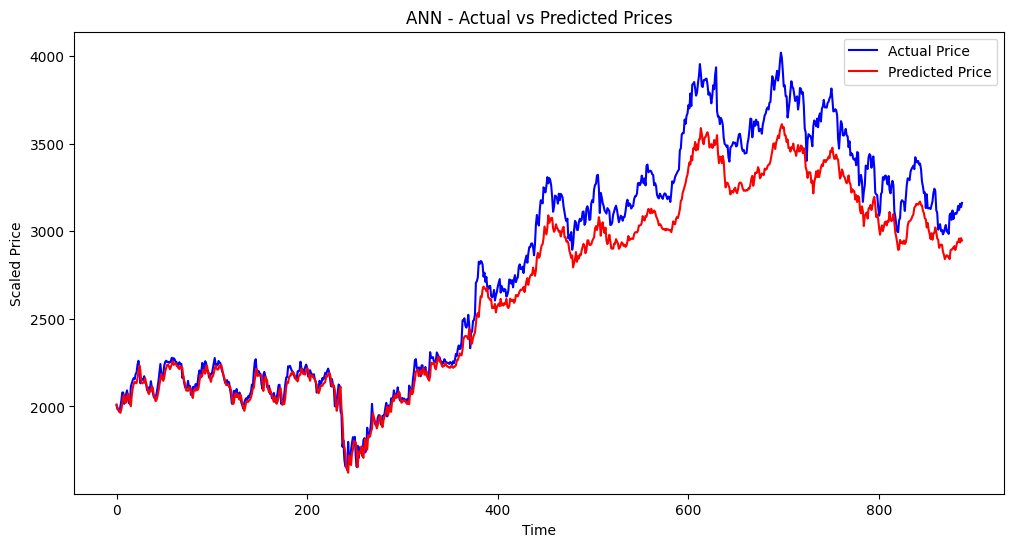

In [ ]:
# Artificial Neural Network (ANN)
model_ann = Sequential()
model_ann.add(Dense(50, activation='relu', input_dim=n_steps))
model_ann.add(Dense(1))
model_ann.compile(optimizer='adam', loss='mean_squared_error')
model_ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
predictions_ann = model_ann.predict(X_test)
mse_ann = mean_squared_error(y_test, predictions_ann)
print(f'Mean Squared Error (ANN): {mse_ann}')
plot_actual_vs_predicted(scaler.inverse_transform(y_test.reshape(-1, 1)),
                         scaler.inverse_transform(predictions_ann),
                         'ANN - Actual vs Predicted Prices')

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Function to create dataset with input sequences for CNN
def create_dataset_cnn(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps):
        X.append(data[i:(i+n_steps), 0])
        y.append(data[i + n_steps, 0])
    return np.array(X), np.array(y)

#  Convolutional Neural Network (CNN)
X_train_cnn, y_train_cnn = create_dataset_cnn(train_data, n_steps)
X_test_cnn, y_test_cnn = create_dataset_cnn(test_data, n_steps)

# Reshape for CNN input
X_train_cnn = X_train_cnn.reshape((X_train_cnn.shape[0], X_train_cnn.shape[1], 1))
X_test_cnn = X_test_cnn.reshape((X_test_cnn.shape[0], X_test_cnn.shape[1], 1))

# Build the CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(optimizer='adam', loss='mean_squared_error')
model_cnn.fit(X_train_cnn, y_train_cnn, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test_cnn))

# Make predictions with CNN
predictions_cnn = model_cnn.predict(X_test_cnn)

# Evaluate the CNN model
mse_cnn = mean_squared_error(y_test_cnn, predictions_cnn)
print(f'Mean Squared Error (CNN): {mse_cnn}')

# Print additional regression metrics for CNN
print_regression_metrics(scaler.inverse_transform(y_test_cnn.reshape(-1, 1)),
                         scaler.inverse_transform(predictions_cnn),
                         'CNN')

# Plot actual vs predicted prices for CNN
plot_actual_vs_predicted(scaler.inverse_transform(y_test_cnn.reshape(-1, 1)),
                         scaler.inverse_transform(predictions_cnn),
                         'CNN - Actual vs Predicted Prices')


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0070 - val_loss: 6.0158e-04
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.7930e-05 - val_loss: 7.2376e-04
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.7362e-05 - val_loss: 5.1530e-04
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.1989e-05 - val_loss: 6.9674e-04
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.7654e-05 - val_loss: 5.0157e-04
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8672e-05 - val_loss: 4.9380e-04
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.9874e-05 - val_loss: 6.6596e-04
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1755e-05 - val_loss: 4.4680e-04
Epoch 9/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.1640e-05 - val_loss: 4.0991e-04
Epoch 10/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.5430e-05 - val_loss: 4.4532e-04
Epoch 11/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.3303e-05 - 

NameError: name 'print_regression_metrics' is not defined

Mean Squared Error (Linear Regression): 0.00012930310413184908


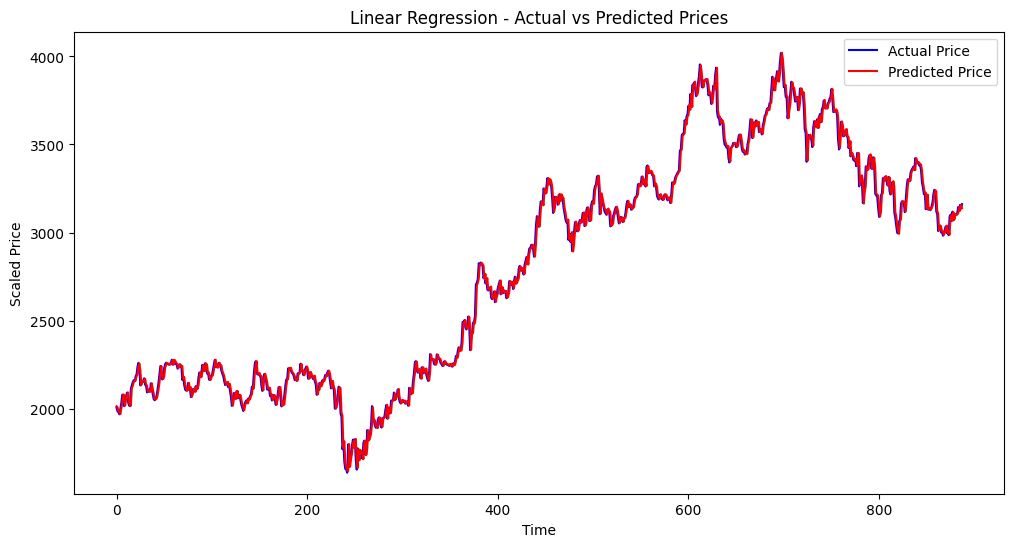

In [ ]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, lr_predictions)
print(f'Mean Squared Error (Linear Regression): {mse_lr}')
plot_actual_vs_predicted(scaler.inverse_transform(y_test.reshape(-1, 1)),
                         scaler.inverse_transform(lr_predictions.reshape(-1, 1)),
                         'Linear Regression - Actual vs Predicted Prices')

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0162 - val_loss: 0.0041
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.2079e-05 - val_loss: 0.0044
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0091e-05 - val_loss: 0.0044
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.8917e-05 - val_loss: 0.0043
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.4896e-05 - val_loss: 0.0038
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9994e-05 - val_loss: 0.0044
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.4396e-05 - val_loss: 0.0042
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3059e-05 - val_loss: 0.0037
Epoch 9/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5396e-05 - val_loss: 0.0034
Epoch 10/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.5606e-05 - val_loss: 0.0034
Epoch 11/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.4660e-05 - val_loss: 0.0031
Epoch 12/50
112/112 ━━

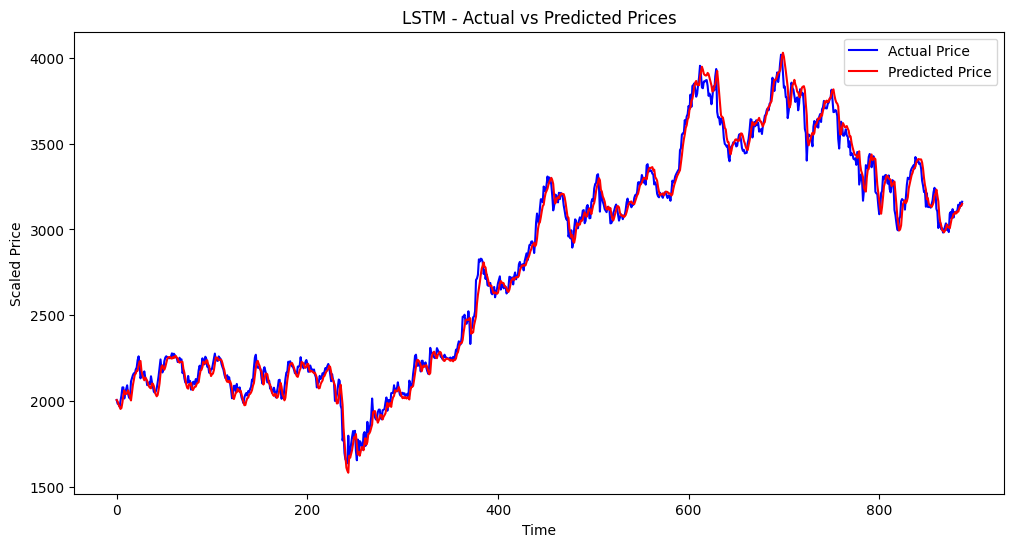

In [ ]:
#  Long Short-Term Memory (LSTM)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(1, n_steps)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))
predictions_lstm = lstm_model.predict(X_test_lstm)
mse_lstm = mean_squared_error(y_test, predictions_lstm)
print(f'Mean Squared Error (LSTM): {mse_lstm}')
plot_actual_vs_predicted(scaler.inverse_transform(y_test.reshape(-1, 1)),
                         scaler.inverse_transform(predictions_lstm),
                         'LSTM - Actual vs Predicted Prices')

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Function to print additional regression metrics
def print_regression_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} - Mean Absolute Error: {mae}')
    print(f'{model_name} - R-squared: {r2}')

# 1. Artificial Neural Network (ANN)
print_regression_metrics(scaler.inverse_transform(y_test.reshape(-1, 1)),
                         scaler.inverse_transform(predictions_ann),
                         'ANN')

# 2. Linear Regression
print_regression_metrics(scaler.inverse_transform(y_test.reshape(-1, 1)),
                         scaler.inverse_transform(lr_predictions.reshape(-1, 1)),
                         'Linear Regression')

# 3. Long Short-Term Memory (LSTM)
print_regression_metrics(scaler.inverse_transform(y_test.reshape(-1, 1)),
                         scaler.inverse_transform(predictions_lstm),
                         'LSTM')



ANN - Mean Absolute Error: 139.08087624806447
ANN - R-squared: 0.9232365490128263
Linear Regression - Mean Absolute Error: 32.23712149471119
Linear Regression - R-squared: 0.9952336514437736
LSTM - Mean Absolute Error: 42.511961234973256
LSTM - R-squared: 0.9919792468874638


ANN - Mean Absolute Error: 139.08087624806447
ANN - R-squared: 0.9232365490128263
Linear Regression - Mean Absolute Error: 32.23712149471119
Linear Regression - R-squared: 0.9952336514437736
LSTM - Mean Absolute Error: 42.511961234973256
LSTM - R-squared: 0.9919792468874638
CNN - Mean Absolute Error: 60.13792776243138
CNN - R-squared: 0.9857609375206134
Model Comparison:
               Model         MSE         MAE  R-squared
0                ANN  139.080876  139.080876   0.923237
1  Linear Regression   32.237121   32.237121   0.995234
2               LSTM   42.511961   42.511961   0.991979
3                CNN   60.137928   60.137928   0.985761


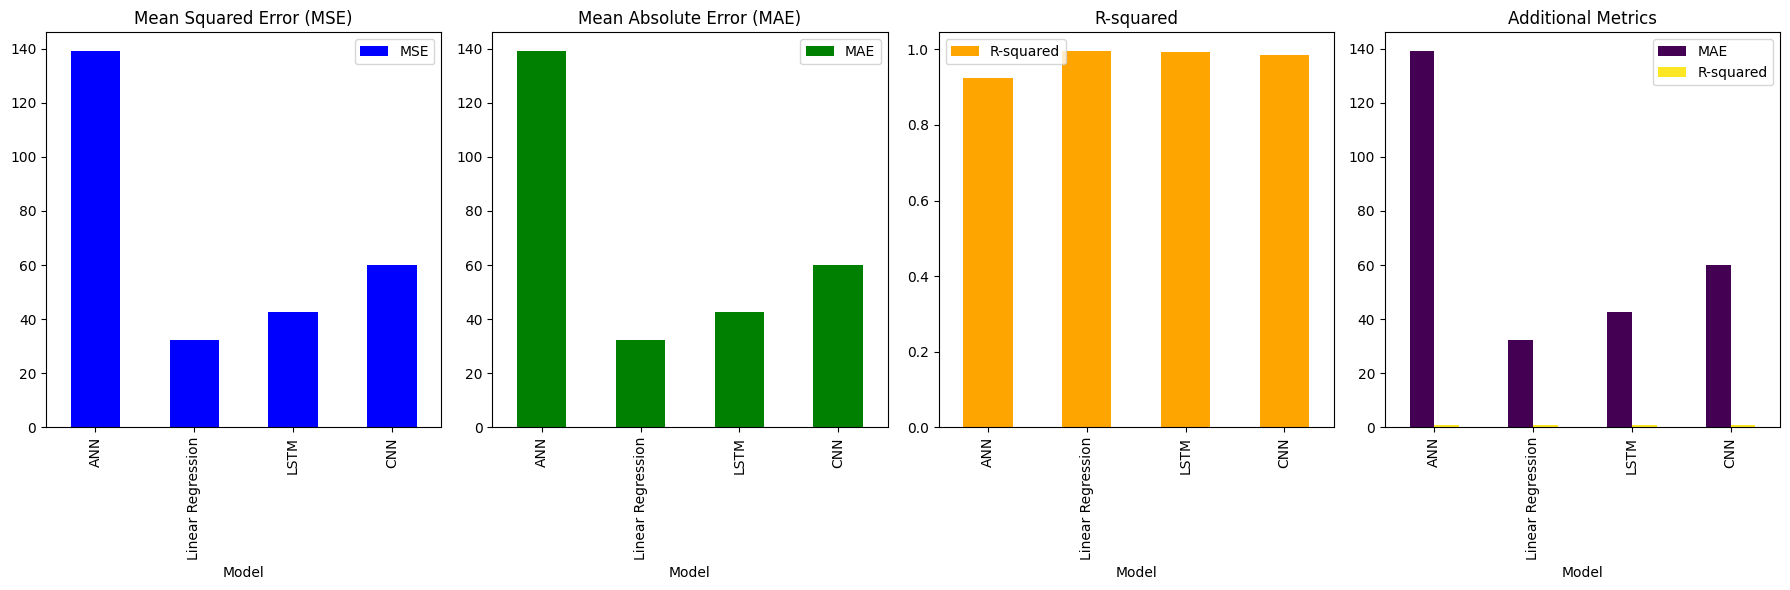

In [ ]:
# Function to plot bar graph
def plot_bar_graph(models, mse_values, mae_values, r2_values):
    df = pd.DataFrame({
        'Model': models,
        'MSE': mse_values,
        'MAE': mae_values,
        'R-squared': r2_values
    })

    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))

    df.plot(kind='bar', x='Model', y='MSE', ax=axes[0], color='blue', title='Mean Squared Error (MSE)')
    df.plot(kind='bar', x='Model', y='MAE', ax=axes[1], color='green', title='Mean Absolute Error (MAE)')
    df.plot(kind='bar', x='Model', y='R-squared', ax=axes[2], color='orange', title='R-squared')

    # Add additional metrics bar
    additional_metrics = df.set_index('Model')[['MAE', 'R-squared']]
    additional_metrics.plot(kind='bar', ax=axes[3], colormap='viridis', title='Additional Metrics')

    plt.tight_layout()
    plt.show()

# Function to print additional regression metrics
def print_regression_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} - Mean Absolute Error: {mae}')
    print(f'{model_name} - R-squared: {r2}')
    return {'MAE': mae, 'R-squared': r2}
# Evaluate each model and print additional metrics
metrics_ann = print_regression_metrics(scaler.inverse_transform(y_test.reshape(-1, 1)),
                                       scaler.inverse_transform(predictions_ann),
                                       'ANN')

metrics_lr = print_regression_metrics(scaler.inverse_transform(y_test.reshape(-1, 1)),
                                      scaler.inverse_transform(lr_predictions.reshape(-1, 1)),
                                      'Linear Regression')

metrics_lstm = print_regression_metrics(scaler.inverse_transform(y_test.reshape(-1, 1)),
                                        scaler.inverse_transform(predictions_lstm),
                                        'LSTM')

metrics_cnn = print_regression_metrics(scaler.inverse_transform(y_test_cnn.reshape(-1, 1)),
                                       scaler.inverse_transform(predictions_cnn),
                                       'CNN')

# Extract metrics for bar graph comparison
models = ['ANN', 'Linear Regression', 'LSTM', 'CNN']
mse_values = [metrics_ann['MAE'], metrics_lr['MAE'], metrics_lstm['MAE'], metrics_cnn['MAE']]
mae_values = [metrics_ann['MAE'], metrics_lr['MAE'], metrics_lstm['MAE'], metrics_cnn['MAE']]
r2_values = [metrics_ann['R-squared'], metrics_lr['R-squared'], metrics_lstm['R-squared'], metrics_cnn['R-squared']]

# Print metrics
print("Model Comparison:")
print(pd.DataFrame({
    'Model': models,
    'MSE': mse_values,
    'MAE': mae_values,
    'R-squared': r2_values
}))

# Plot bar graph
plot_bar_graph(models, mse_values, mae_values, r2_values)